In [1]:
# importing important libraries
import matplotlib as plt
%matplotlib inline
import numpy as np
from sklearn import mixture
import pandas as pd
import seaborn as sns

In [2]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

# Reading in the Data

In [124]:
pass_attempt_df = \
    pd.read_csv("~/Desktop/CoverageNet/src/01_identify_man_coverage/outputs/linebackers_pass_attempts_man_zone_gmm_features_no_rushers.csv")
pass_attempt_df.shape

(29290, 157)

In [125]:
sacks_df = \
    pd.read_csv("~/Desktop/CoverageNet/src/01_identify_man_coverage/outputs/linebackers_sacks_man_zone_gmm_features_no_rushers.csv")
sacks_df.shape

(1767, 98)

In [126]:
# printing the number of weeks of data available
np.unique(pass_attempt_df['week'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

# Clustering Pass Attempt Coverage

In [127]:
filter_col = [col for col in pass_attempt_df if not '_o_' in col]
pass_attempt_df = pass_attempt_df[filter_col]

In [128]:
filter_col = [col for col in pass_attempt_df if not 'facing' in col]
pass_attempt_df = pass_attempt_df[filter_col]

In [129]:
filter_col = [col for col in pass_attempt_df if not 'var_y' in col]
pass_attempt_df = pass_attempt_df[filter_col]

In [130]:
filter_col = [col for col in pass_attempt_df if not 'var_x' in col]
pass_attempt_df = pass_attempt_df[filter_col]

In [131]:
filter_col = [col for col in pass_attempt_df if not 'def_mean_time_0' in col]
pass_attempt_df = pass_attempt_df[filter_col]

In [132]:
filter_col = [col for col in pass_attempt_df if not 'def' in col]
pass_attempt_df = pass_attempt_df[filter_col]

In [133]:
filter_col = [col for col in pass_attempt_df if not 'def_var_time_0' in col]
pass_attempt_df = pass_attempt_df[filter_col]

In [134]:
pass_attempt_df.columns

Index(['week', 'gameId', 'playId', 'nflId', 'displayName', 'position',
       'speed_var_time_0', 'speed_var_time_0_1', 'speed_var_time_1',
       'speed_var_time_1_2',
       ...
       'best_cor_y_time_0', 'best_cor_y_time_0_1', 'best_cor_y_time_1',
       'best_cor_y_time_1_2', 'best_cor_y_time_2', 'best_cor_x_y_avg_time_0',
       'best_cor_x_y_avg_time_0_1', 'best_cor_x_y_avg_time_1',
       'best_cor_x_y_avg_time_1_2', 'best_cor_x_y_avg_time_2'],
      dtype='object', length=105)

In [135]:
filter_col = [col for col in pass_attempt_df if not (('cor' in col) and ('best' not in col) and ('s' not in col))]
pass_attempt_df = pass_attempt_df[filter_col]

In [136]:
filter_col = [col for col in pass_attempt_df if not (('cor_rot' in col))]
pass_attempt_df = pass_attempt_df[filter_col]

In [137]:
filter_col = [col for col in pass_attempt_df if not (('cor' in col) and ('time_0' in col))]
pass_attempt_df = pass_attempt_df[filter_col]

In [138]:
filter_col = [col for col in pass_attempt_df if not (('cor' in col) and ('time_2' in col))]
pass_attempt_df = pass_attempt_df[filter_col]

In [139]:
# filter_col = [col for col in pass_attempt_df if not (('cor' in col) and ('x_y' not in col))]
# pass_attempt_df = pass_attempt_df[filter_col]

In [140]:
filter_col = [col for col in pass_attempt_df if not 'off_dir_var_time_0' in col]
pass_attempt_df = pass_attempt_df[filter_col]

In [141]:
filter_col = [col for col in pass_attempt_df if not 'speed' in col]
pass_attempt_df = pass_attempt_df[filter_col]

In [142]:
pass_attempt_df = pass_attempt_df.drop(['cb_off_dir_diff_ball_snap', 'cb_off_dist_ball_snap',
                                       'off_dir_mean_time_0', 'cb_off_dist_pass_forward',
                                       'off_mean_between_ball_snap_and_pass_forward'], axis = 1)

In [143]:
filter_col = [col for col in pass_attempt_df if (not 'rat' in col)|('ratio_pass_forward' in col)]
pass_attempt_df = pass_attempt_df[filter_col]

In [144]:
# filter_col = [col for col in pass_attempt_df if (not 'best' in col)]
# pass_attempt_df = pass_attempt_df[filter_col]

In [145]:
pass_attempt_df.columns

Index(['week', 'gameId', 'playId', 'nflId', 'displayName', 'position',
       'off_var_time_0', 'off_var_time_0_1', 'off_var_time_1',
       'off_var_time_1_2', 'off_var_time_2', 'off_mean_time_0',
       'off_mean_time_0_1', 'off_mean_time_1', 'off_mean_time_1_2',
       'off_mean_time_2', 'off_dir_var_time_1', 'off_dir_var_time_1_2',
       'off_dir_var_time_2', 'off_dir_mean_time_0_1', 'off_dir_mean_time_1',
       'off_dir_mean_time_1_2', 'off_dir_mean_time_2', 'cor_s_time_1',
       'cor_s_time_1_2', 'ratio_pass_forward', 'cb_off_dir_diff_pass_forward',
       'off_dir_diff_between_ball_snap_and_pass_forward', 'best_cor_x_time_1',
       'best_cor_x_time_1_2', 'best_cor_y_time_1', 'best_cor_y_time_1_2',
       'best_cor_x_y_avg_time_1', 'best_cor_x_y_avg_time_1_2'],
      dtype='object')

In [146]:
pass_attempt_df["cor_dist_inter"] = (pass_attempt_df["best_cor_x_y_avg_time_1"]**2)/pass_attempt_df["off_mean_time_1"]
pass_attempt_df["cor_dist_inter"] = pass_attempt_df["cor_dist_inter"].fillna(0)
pass_attempt_df["cor_dist_inter"] = pass_attempt_df["cor_dist_inter"].replace([np.inf], \
                np.percentile(np.array(pass_attempt_df["cor_dist_inter"]), 99))
pass_attempt_df["cor_dist_inter"] = pass_attempt_df["cor_dist_inter"].replace([-np.inf], \
                np.percentile(np.array(pass_attempt_df["cor_dist_inter"]), 1))

In [147]:
pass_attempt_df.head(10)

,week,gameId,playId,nflId,displayName,position,off_var_time_0,off_var_time_0_1,off_var_time_1,off_var_time_1_2,...,ratio_pass_forward,cb_off_dir_diff_pass_forward,off_dir_diff_between_ball_snap_and_pass_forward,best_cor_x_time_1,best_cor_x_time_1_2,best_cor_y_time_1,best_cor_y_time_1_2,best_cor_x_y_avg_time_1,best_cor_x_y_avg_time_1_2,cor_dist_inter
0,1,2018090600,75,2552315,Jordan Hicks,MLB,0.001303,2.085897,2.002326,1.467688,...,0.827710,38.51,171.86,-0.109033,0.795172,0.990021,0.927844,0.440494,0.861508,0.040278
1,1,2018090600,75,2558175,Nate Gerry,LB,0.000493,0.670105,0.878753,0.839347,...,1.179711,42.82,56.16,0.946952,0.957219,0.990986,0.864381,0.968969,0.910800,0.168264
2,1,2018090600,146,2552315,Jordan Hicks,MLB,0.000034,0.414321,0.553661,2.006090,...,1.024368,95.42,14.56,0.894274,0.957562,0.963245,0.953468,0.928760,0.955515,0.136255
3,1,2018090600,146,2556363,Kamu Grugier-Hill,OLB,0.003086,2.208688,2.400657,2.309942,...,1.113821,49.97,106.82,0.818192,0.867466,0.954204,0.598747,0.886198,0.733106,0.182547
4,1,2018090600,168,2552315,Jordan Hicks,MLB,0.000127,3.665084,3.950894,3.611672,...,1.304995,82.31,71.29,-0.978096,0.545482,0.996558,-0.129083,0.009231,0.208199,0.000011
5,1,2018090600,168,2556363,Kamu Grugier-Hill,OLB,0.000631,4.088357,4.393762,9.359914,...,0.766287,55.44,66.40,-0.966562,-0.783156,0.993911,0.997322,0.013674,0.107083,0.000023
6,1,2018090600,256,2552315,Jordan Hicks,MLB,0.012023,0.184167,0.220404,0.284113,...,3.060857,21.24,81.14,0.978594,0.971132,0.907902,0.983829,0.943248,0.977480,0.120258
7,1,2018090600,256,2556363,Kamu Grugier-Hill,OLB,0.030573,0.584233,0.617497,2.236578,...,0.614270,46.12,24.10,0.997387,0.953758,0.981838,0.991478,0.989613,0.972618,0.187451
8,1,2018090600,256,2558175,Nate Gerry,LB,0.161107,2.033718,1.310102,1.148418,...,0.326706,26.25,170.25,0.930260,0.968140,0.770423,0.987884,0.850342,0.978012,0.211647
9,1,2018090600,320,2555162,Deion Jones,MLB,0.001273,1.523941,1.778932,1.835451,...,1.493859,2.03,46.17,0.995846,0.998418,0.988831,0.964001,0.992338,0.981209,0.158514


In [148]:
pass_attempt_df.columns

Index(['week', 'gameId', 'playId', 'nflId', 'displayName', 'position',
       'off_var_time_0', 'off_var_time_0_1', 'off_var_time_1',
       'off_var_time_1_2', 'off_var_time_2', 'off_mean_time_0',
       'off_mean_time_0_1', 'off_mean_time_1', 'off_mean_time_1_2',
       'off_mean_time_2', 'off_dir_var_time_1', 'off_dir_var_time_1_2',
       'off_dir_var_time_2', 'off_dir_mean_time_0_1', 'off_dir_mean_time_1',
       'off_dir_mean_time_1_2', 'off_dir_mean_time_2', 'cor_s_time_1',
       'cor_s_time_1_2', 'ratio_pass_forward', 'cb_off_dir_diff_pass_forward',
       'off_dir_diff_between_ball_snap_and_pass_forward', 'best_cor_x_time_1',
       'best_cor_x_time_1_2', 'best_cor_y_time_1', 'best_cor_y_time_1_2',
       'best_cor_x_y_avg_time_1', 'best_cor_x_y_avg_time_1_2',
       'cor_dist_inter'],
      dtype='object')

### Preparing Train/Test Groups

In [149]:
weeks_exclude = [1, 2, 3]
train = pass_attempt_df[[x not in weeks_exclude for x in list(pass_attempt_df["week"])]]
test = pass_attempt_df[[x in weeks_exclude for x in list(pass_attempt_df["week"])]]

In [150]:
X_train = train.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
X_test = test.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)

In [151]:
print(X_train.shape)
print(X_test.shape)

(23646, 29)
(5644, 29)


### Fitting GMM Model

In [152]:
# train
clf_train = mixture.GaussianMixture(n_components=3, covariance_type='full')
f_train = clf_train.fit(X_train)

In [153]:
# test
clf_test = mixture.GaussianMixture(n_components=3, covariance_type='full')
f_test = clf_test.fit(X_test)

### Examining Cluster Results

In [154]:
def get_cluster_means(X, f):
    cluster_means = {}
    for iCnt in range(len(X.columns)):
        cluster_means.update({X.columns[iCnt]:(f.means_[0][iCnt],
                                               f.means_[1][iCnt],
                                               f.means_[2][iCnt])})
    return cluster_means

In [155]:
get_cluster_means(X_train, f_train)

{'best_cor_x_time_1': (0.7155018313500486,
  0.9761931557181974,
  0.7876569803555526),
 'best_cor_x_time_1_2': (0.6894563432166846,
  0.9708742513094798,
  0.7555058238579467),
 'best_cor_x_y_avg_time_1': (0.7159926170211794,
  0.9762838224135815,
  0.7669395832801416),
 'best_cor_x_y_avg_time_1_2': (0.7286120326360858,
  0.9661081688034576,
  0.7523265789313552),
 'best_cor_y_time_1': (0.7164834026373259,
  0.9763744895139489,
  0.7462221865090629),
 'best_cor_y_time_1_2': (0.7677677215735907,
  0.9613420863666177,
  0.7491473346140346),
 'cb_off_dir_diff_pass_forward': (38.0267644253485,
  33.179537766084,
  71.23810158734165),
 'cor_dist_inter': (0.1135664080559506,
  0.21952550205993954,
  0.11686436187057285),
 'cor_s_time_1': (0.7269911612683141, 0.8774638375326284, 0.6260531391536068),
 'cor_s_time_1_2': (0.6450532913570887,
  0.768816535238976,
  0.47796110269857356),
 'off_dir_diff_between_ball_snap_and_pass_forward': (72.81991545627184,
  35.29113055612706,
  63.693426991320

### Computing Rand Index

In [156]:
from sklearn.metrics import adjusted_rand_score

In [157]:
y_train = f_train.predict(X_test)
y_test = f_test.predict(X_test)

In [158]:
adjusted_rand_score(y_train, y_test)

0.5953051317629995

### Iterating Through To Get Cross-Validation Scores

In [159]:
weeks_exclude_vect = [[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15],[15,16,17]]
G_vect = [2, 3, 4, 5, 6, 7, 8, 9]
rand_index_G_vect = []

In [160]:
for G in G_vect:
    rand_index_sum = 0
    # iterating through the week groupings to leave out
    for weeks_exclue in weeks_exclude_vect:
        # creating train/test groups
        train = pass_attempt_df[[x not in weeks_exclude for x in list(pass_attempt_df["week"])]]
        test = pass_attempt_df[[x in weeks_exclude for x in list(pass_attempt_df["week"])]]

        X_train = train.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
        X_test = test.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)

        # train
        clf_train = mixture.GaussianMixture(n_components=G, covariance_type='full', 
                                            n_init = 2, max_iter = 200)
        f_train = clf_train.fit(X_train)

        # test
        clf_test = mixture.GaussianMixture(n_components=G, covariance_type='full',
                                           n_init = 2, max_iter = 200)
        f_test = clf_test.fit(X_test)

        # classifying test group
        y_train = f_train.predict(X_test)
        y_test = f_test.predict(X_test)

        # appling the adjusted rand index
        rand_index_val = adjusted_rand_score(y_train, y_test)
        rand_index_sum += rand_index_val

    rand_index = rand_index_sum/len(weeks_exclude_vect)
    
    rand_index_G_vect.append(rand_index)
    
    print(rand_index)

0.3961365052417733
0.5969924106293699


KeyboardInterrupt: 

### Plot eliminating x/y var, speed, and def based variables, replacing Ratio with Cor

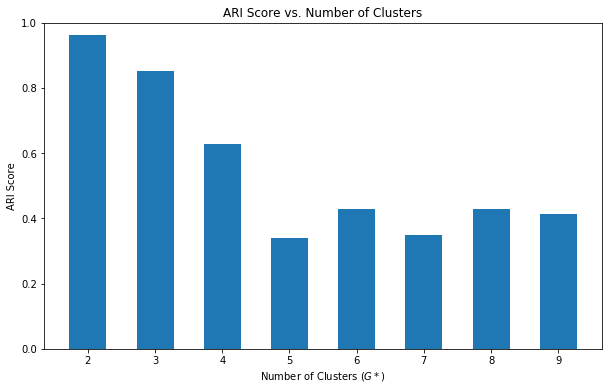

In [40]:
plt.pyplot.figure(figsize=(10, 6))
# plotting the results
plt.pyplot.bar(x = G_vect,
               height = rand_index_G_vect,
               width = .55)
plt.pyplot.xlabel('Number of Clusters ($G*$)')
plt.pyplot.ylabel('ARI Score')
plt.pyplot.ylim(0,1)
plt.pyplot.title('ARI Score vs. Number of Clusters')
plt.pyplot.show()

### Feature Importance

In [41]:
import sys
weeks_exclude_vect = [[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15],[15,16,17]]
feature_list = list(X_train.columns)
rand_index_vect = []

# making a waitbar
toolbar_width = len(feature_list)

In [42]:
sys.stdout.write("[%s]" % (" " * toolbar_width))
sys.stdout.flush()
sys.stdout.write("\b" * (toolbar_width+1))

for feature in feature_list:
    
    rand_index_sum = 0

    # iterating through the week groupings to leave out
    for weeks_exclue in weeks_exclude_vect:
        # creating train/test groups
        train = pass_attempt_df[[x not in weeks_exclude for \
                                 x in list(pass_attempt_df["week"])]].drop([feature], axis = 1)
        test = pass_attempt_df[[x in weeks_exclude for \
                                x in list(pass_attempt_df["week"])]].drop([feature], axis = 1)

        X_train = train.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
        X_test = test.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)

        # train
        clf_train = mixture.GaussianMixture(n_components=2, covariance_type='full')
        f_train = clf_train.fit(X_train)

        # test
        clf_test = mixture.GaussianMixture(n_components=2, covariance_type='full')
        f_test = clf_test.fit(X_test)

        # classifying test group
        y_train = f_train.predict(X_test)
        y_test = f_test.predict(X_test)

        # appling the adjusted rand index
        rand_index_val = adjusted_rand_score(y_train, y_test)
        rand_index_sum += rand_index_val

    rand_index = rand_index_sum/len(weeks_exclude_vect)
    
    rand_index_vect.append(rand_index)
    
    sys.stdout.write("-")
    sys.stdout.flush()

[                            -----------------------------

In [43]:
d = {'feature': feature_list, 'delta_ARI': rand_index_G_vect[0] - np.array(rand_index_vect)}
feature_imp_df = pd.DataFrame(data=d).sort_values('delta_ARI', ascending = False)
feature_imp_df["base_feature"] = [x.split('_pass_forward')[0] if "pass_forward" in x \
                                  else x.split('_ball_snap')[0] if "ball_snap" in x \
                                  else x.split('_time')[0] for x in np.array(feature_imp_df["feature"])]
feature_imp_df["time_period"] = ["Before Ball Thrown" if "pass_forward" in x \
                                 else "Before Ball Thrown" if "ball_snap" in x \
                                 else "After Ball Thrown" if x.endswith("2") \
                                 else "Before Ball Thrown" for x in np.array(feature_imp_df["feature"])]
feature_imp_df["feature"] = [x.upper() for x in feature_imp_df["feature"]]

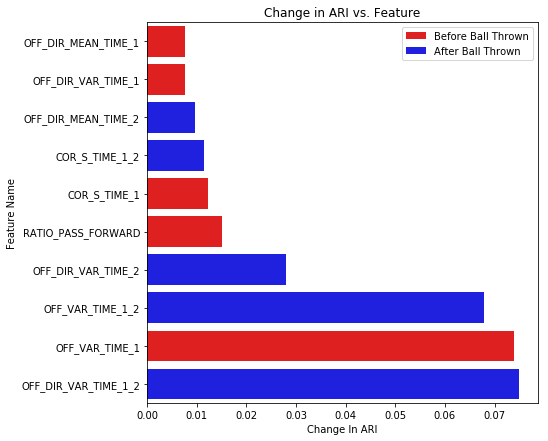

In [44]:
plt.pyplot.figure(figsize=(7,7))

sns.barplot(x="delta_ARI", y="feature", data=feature_imp_df.head(10).sort_values('delta_ARI', ascending = True),
            hue = "time_period", dodge = False, palette = ["red", "blue"])
plt.pyplot.gca().legend().set_title('')
plt.pyplot.title('Change in ARI vs. Feature')
plt.pyplot.ylabel('Feature Name')
plt.pyplot.xlabel('Change In ARI')
plt.pyplot.show()

### Scoring All Plays

In [161]:
pass_attempt_df

,week,gameId,playId,nflId,displayName,position,off_var_time_0,off_var_time_0_1,off_var_time_1,off_var_time_1_2,...,ratio_pass_forward,cb_off_dir_diff_pass_forward,off_dir_diff_between_ball_snap_and_pass_forward,best_cor_x_time_1,best_cor_x_time_1_2,best_cor_y_time_1,best_cor_y_time_1_2,best_cor_x_y_avg_time_1,best_cor_x_y_avg_time_1_2,cor_dist_inter
0,1,2018090600,75,2552315,Jordan Hicks,MLB,0.001303,2.085897,2.002326,1.467688,...,0.827710,38.51,171.86,-0.109033,0.795172,0.990021,0.927844,0.440494,0.861508,0.040278
1,1,2018090600,75,2558175,Nate Gerry,LB,0.000493,0.670105,0.878753,0.839347,...,1.179711,42.82,56.16,0.946952,0.957219,0.990986,0.864381,0.968969,0.910800,0.168264
2,1,2018090600,146,2552315,Jordan Hicks,MLB,0.000034,0.414321,0.553661,2.006090,...,1.024368,95.42,14.56,0.894274,0.957562,0.963245,0.953468,0.928760,0.955515,0.136255
3,1,2018090600,146,2556363,Kamu Grugier-Hill,OLB,0.003086,2.208688,2.400657,2.309942,...,1.113821,49.97,106.82,0.818192,0.867466,0.954204,0.598747,0.886198,0.733106,0.182547
4,1,2018090600,168,2552315,Jordan Hicks,MLB,0.000127,3.665084,3.950894,3.611672,...,1.304995,82.31,71.29,-0.978096,0.545482,0.996558,-0.129083,0.009231,0.208199,0.000011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29285,17,2018123015,3819,2540140,Barkevious Mingo,OLB,0.477275,2.352230,2.948215,3.977932,...,2.130586,83.91,34.85,0.988546,0.992104,0.979727,0.991328,0.984136,0.991716,0.215182
29286,17,2018123015,3969,2532966,Bobby Wagner,MLB,0.000304,0.485455,0.608307,0.702361,...,0.314022,145.89,95.93,0.589404,0.572559,0.929103,-0.179764,0.759254,0.196397,0.085026
29287,17,2018123015,4057,2543769,Deone Bucannon,ILB,0.000782,1.839250,2.345472,2.278569,...,1.776552,67.15,49.12,0.995493,0.973682,0.998709,0.999536,0.997101,0.986609,0.164214
29288,17,2018123015,4104,2543769,Deone Bucannon,ILB,0.003812,2.465509,2.247225,2.456899,...,5.204992,29.27,22.86,0.997233,0.987676,0.984874,0.990796,0.991054,0.989236,0.129471


In [166]:
# sampling 45,000 plays to be within CPU limit
X_train = pass_attempt_df \
                         .drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
X_train.shape

(29290, 29)

In [167]:
# all plays to score
X_score = pass_attempt_df.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
X_score.shape

(29290, 29)

In [168]:
# train
clf_train = mixture.GaussianMixture(n_components=3, covariance_type='full')
f_train = clf_train.fit(X_train)

In [169]:
get_cluster_means(X_train, f_train)

{'best_cor_x_time_1': (0.7267040994609629,
  0.9653578049733542,
  0.795548334131586),
 'best_cor_x_time_1_2': (0.6898536313890502,
  0.9612146789744176,
  0.7880912141870372),
 'best_cor_x_y_avg_time_1': (0.7207489282578313,
  0.9617421608591372,
  0.7914948933274797),
 'best_cor_x_y_avg_time_1_2': (0.720189293285737,
  0.9521798660938294,
  0.7933943560101102),
 'best_cor_y_time_1': (0.7147937572824052,
  0.9581265165146443,
  0.7874414530410703),
 'best_cor_y_time_1_2': (0.7505249549317008,
  0.9431450532433142,
  0.7986974983990572),
 'cb_off_dir_diff_pass_forward': (56.696741146061605,
  25.51695077011659,
  56.27005820874645),
 'cor_dist_inter': (0.10797392599514924,
  0.21207955930616462,
  0.13796099226632424),
 'cor_s_time_1': (0.7245135083852339, 0.8566047514359992, 0.6128699842723311),
 'cor_s_time_1_2': (0.5959898253110673,
  0.7703177080178134,
  0.49811408073309343),
 'off_dir_diff_between_ball_snap_and_pass_forward': (71.67375658530985,
  38.3351031936369,
  59.130772609

In [170]:
full_probs = [1 - x[1] for x in f_train.predict_proba(X_score)]
full_classes = [0 if x == 1 else 1 for x in f_train.predict(X_score)]

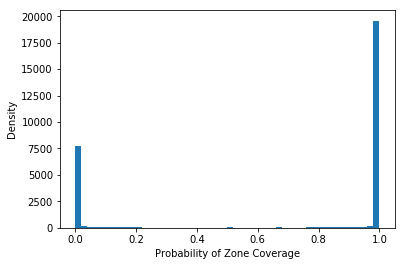

In [171]:
plt.pyplot.hist(full_probs, bins = 50)
plt.pyplot.xlabel('Probability of Zone Coverage')
plt.pyplot.ylabel('Density')
plt.pyplot.show()

In [172]:
pass_attempt_df["zone_probability"] = full_probs
pass_attempt_df["zone_flag"] = full_classes

### Saving Results

In [173]:
pass_attempt_df_final = pass_attempt_df[['week', 'gameId','playId','nflId','displayName','position'] + \
                                     list(pass_attempt_df.columns[[x.startswith('zone') for x in pass_attempt_df.columns]])].sort_values(['gameId', 'playId', 'position'])

In [174]:
pass_attempt_df_final

,week,gameId,playId,nflId,displayName,position,zone_probability,zone_flag
1,1,2018090600,75,2558175,Nate Gerry,LB,0.000006,0
0,1,2018090600,75,2552315,Jordan Hicks,MLB,1.000000,1
2,1,2018090600,146,2552315,Jordan Hicks,MLB,0.982440,1
3,1,2018090600,146,2556363,Kamu Grugier-Hill,OLB,0.967312,1
4,1,2018090600,168,2552315,Jordan Hicks,MLB,1.000000,1
...,...,...,...,...,...,...,...,...
29285,17,2018123015,3819,2540140,Barkevious Mingo,OLB,1.000000,1
29286,17,2018123015,3969,2532966,Bobby Wagner,MLB,1.000000,1
29287,17,2018123015,4057,2543769,Deone Bucannon,ILB,0.000007,0
29288,17,2018123015,4104,2543769,Deone Bucannon,ILB,1.000000,1


In [176]:
pass_attempt_df_final.to_csv("~/Desktop/CoverageNet/src/01_identify_man_coverage/outputs/linebackers_pass_attempts_man_zone_classes.csv", 
                             index = False)

In [175]:
pass_attempt_df[(pass_attempt_df["gameId"] == 2018090600) & (pass_attempt_df["playId"] == 168)]

,week,gameId,playId,nflId,displayName,position,off_var_time_0,off_var_time_0_1,off_var_time_1,off_var_time_1_2,...,off_dir_diff_between_ball_snap_and_pass_forward,best_cor_x_time_1,best_cor_x_time_1_2,best_cor_y_time_1,best_cor_y_time_1_2,best_cor_x_y_avg_time_1,best_cor_x_y_avg_time_1_2,cor_dist_inter,zone_probability,zone_flag
4,1,2018090600,168,2552315,Jordan Hicks,MLB,0.000127,3.665084,3.950894,3.611672,...,71.29,-0.978096,0.545482,0.996558,-0.129083,0.009231,0.208199,0.000011,1.0,1
5,1,2018090600,168,2556363,Kamu Grugier-Hill,OLB,0.000631,4.088357,4.393762,9.359914,...,66.40,-0.966562,-0.783156,0.993911,0.997322,0.013674,0.107083,0.000023,1.0,1


In [78]:
pass_attempt_df[(pass_attempt_df["gameId"] == 2018091001) & (pass_attempt_df["playId"] == 3175)][["displayName"] + \
                            list(pass_attempt_df.columns[['off_mean' in x for x in pass_attempt_df.columns]])]

,displayName,off_mean_time_0,off_mean_time_0_1,off_mean_time_1,off_mean_time_1_2,off_mean_time_2
2564,Tahir Whitehead,6.427505,6.042054,5.899294,5.894474,5.872787
2565,Marquel Lee,5.145860,4.424178,4.156889,3.796330,2.173816


# Repeating for Sack Plays!

In [177]:
filter_col = [col for col in sacks_df if not '_o_' in col]
sacks_df = sacks_df[filter_col]

In [178]:
filter_col = [col for col in sacks_df if not 'facing' in col]
sacks_df = sacks_df[filter_col]

In [179]:
filter_col = [col for col in sacks_df if not 'var_y' in col]
sacks_df = sacks_df[filter_col]

In [180]:
filter_col = [col for col in sacks_df if not 'var_x' in col]
sacks_df = sacks_df[filter_col]

In [181]:
filter_col = [col for col in sacks_df if not 'def_mean_time_0' in col]
sacks_df = sacks_df[filter_col]

In [182]:
filter_col = [col for col in sacks_df if not 'def' in col]
sacks_df = sacks_df[filter_col]

In [183]:
filter_col = [col for col in sacks_df if not 'def_var_time_0' in col]
sacks_df = sacks_df[filter_col]

In [184]:
sacks_df.columns

Index(['week', 'gameId', 'playId', 'nflId', 'displayName', 'position',
       'speed_var_time_0', 'speed_var_time_0_1', 'speed_var_time_1',
       'speed_mean_time_0', 'speed_mean_time_0_1', 'speed_mean_time_1',
       'off_var_time_0', 'off_var_time_0_1', 'off_var_time_1',
       'off_mean_time_0', 'off_mean_time_0_1', 'off_mean_time_1',
       'off_dir_var_time_0', 'off_dir_var_time_0_1', 'off_dir_var_time_1',
       'off_dir_mean_time_0', 'off_dir_mean_time_0_1', 'off_dir_mean_time_1',
       'rat_mean_time_0', 'rat_mean_time_0_1', 'rat_mean_time_1',
       'rat_var_time_0', 'rat_var_time_0_1', 'rat_var_time_1', 'cor_x_time_0',
       'cor_x_time_0_1', 'cor_x_time_1', 'cor_y_time_0', 'cor_y_time_0_1',
       'cor_y_time_1', 'cor_s_time_0', 'cor_s_time_0_1', 'cor_s_time_1',
       'cor_avg_x_y_time_0', 'cor_avg_x_y_time_0_1', 'cor_avg_x_y_time_1',
       'cor_rot_best_x_time_0', 'cor_rot_best_x_time_0_1',
       'cor_rot_best_x_time_1', 'cor_rot_best_y_time_0',
       'cor_rot_best_y

In [185]:
filter_col = [col for col in sacks_df if not (('cor' in col) and ('best' not in col) and ('s' not in col))]
sacks_df = sacks_df[filter_col]

In [186]:
filter_col = [col for col in sacks_df if not (('cor_rot' in col))]
sacks_df = sacks_df[filter_col]

In [187]:
filter_col = [col for col in sacks_df if not (('cor' in col) and ('time_0' in col))]
sacks_df = sacks_df[filter_col]

In [188]:
filter_col = [col for col in sacks_df if not (('cor' in col) and ('time_2' in col))]
sacks_df = sacks_df[filter_col]

In [189]:
filter_col = [col for col in sacks_df if not 'off_dir_var_time_0' in col]
sacks_df = sacks_df[filter_col]

In [190]:
filter_col = [col for col in sacks_df if not 'speed' in col]
sacks_df = sacks_df[filter_col]

In [191]:
sacks_df = sacks_df.drop(['cb_off_dir_diff_ball_snap', 'cb_off_dist_ball_snap',
                                       'off_dir_mean_time_0'
                                       ], axis = 1)

In [192]:
filter_col = [col for col in sacks_df if (not 'rat' in col)|('ratio_pass_forward' in col)]
sacks_df = sacks_df[filter_col]

In [193]:
filter_col = [col for col in sacks_df if (not '2' in col)]
sacks_df = sacks_df[filter_col]

In [194]:
sacks_df.columns

Index(['week', 'gameId', 'playId', 'nflId', 'displayName', 'position',
       'off_var_time_0', 'off_var_time_0_1', 'off_var_time_1',
       'off_mean_time_0', 'off_mean_time_0_1', 'off_mean_time_1',
       'off_dir_var_time_1', 'off_dir_mean_time_0_1', 'off_dir_mean_time_1',
       'cor_s_time_1', 'cb_off_dir_diff_qb_sack', 'cb_off_dist_qb_sack',
       'best_cor_x_time_1', 'best_cor_y_time_1', 'best_cor_x_y_avg_time_1'],
      dtype='object')

In [195]:
sacks_df["cor_dist_inter"] = (sacks_df["best_cor_x_y_avg_time_1"]**2)/sacks_df["off_mean_time_1"]
sacks_df["cor_dist_inter"] = sacks_df["cor_dist_inter"].fillna(0)
sacks_df["cor_dist_inter"] = sacks_df["cor_dist_inter"].replace([np.inf], \
                np.percentile(np.array(sacks_df["cor_dist_inter"]), 99))
sacks_df["cor_dist_inter"] = sacks_df["cor_dist_inter"].replace([-np.inf], \
                np.percentile(np.array(sacks_df["cor_dist_inter"]), 1))

In [196]:
sacks_df.head(10)

,week,gameId,playId,nflId,displayName,position,off_var_time_0,off_var_time_0_1,off_var_time_1,off_mean_time_0,...,off_dir_var_time_1,off_dir_mean_time_0_1,off_dir_mean_time_1,cor_s_time_1,cb_off_dir_diff_qb_sack,cb_off_dist_qb_sack,best_cor_x_time_1,best_cor_y_time_1,best_cor_x_y_avg_time_1,cor_dist_inter
0,1,2018090600,776,2552301,Vic Beasley,OLB,0.000054,7.225394,8.588984,2.513854,...,2142.696558,74.006458,66.178684,0.764220,31.19,9.550775,0.988115,0.427971,0.708043,0.120127
1,1,2018090600,776,2555162,Deion Jones,MLB,0.000074,8.788880,7.742856,9.555725,...,456.666513,35.668750,27.611842,0.927958,9.99,1.269055,0.985413,0.640412,0.812913,0.118920
2,1,2018090600,839,2552301,Vic Beasley,OLB,0.000022,16.777484,16.343167,2.105464,...,1277.701078,70.846271,69.978776,0.014541,65.97,8.770091,0.969199,0.697843,0.833521,0.101113
3,1,2018090600,839,2555162,Deion Jones,MLB,0.000010,6.422039,7.592978,6.684927,...,2199.712876,62.372034,63.686939,0.538696,60.60,9.355154,0.879990,0.406924,0.643457,0.072606
4,1,2018090600,839,2555255,De'Vondre Campbell,OLB,0.014267,3.079978,3.718855,6.003950,...,3617.688800,70.053729,63.390000,0.678549,5.19,7.037230,0.933017,0.981179,0.957098,0.151932
5,1,2018090600,3815,2552315,Jordan Hicks,MLB,0.001452,1.298739,1.168851,7.091151,...,2753.802737,73.947358,80.272326,0.232434,19.85,6.299817,0.927999,0.842411,0.885205,0.140328
6,1,2018090900,466,2543464,C.J. Mosley,ILB,0.000023,3.030636,3.632676,5.229545,...,689.396401,26.589016,29.052941,0.474874,48.91,6.017317,0.997241,0.978505,0.987873,0.192359
7,1,2018090900,1385,2557969,Matt Milano,OLB,0.000062,10.685659,10.882569,4.293652,...,2464.414841,72.134762,79.445811,0.359788,98.39,9.978462,0.914318,0.707455,0.810886,0.087279
8,1,2018090900,1385,2560713,Tremaine Edmunds,LB,0.000230,4.667542,5.284140,5.254359,...,2175.203284,55.892262,44.329189,0.232014,11.68,1.601624,0.592546,0.849366,0.720956,0.107837
9,1,2018090900,1594,2556642,Patrick Onwuasor,ILB,0.002569,1.644275,1.757581,9.688941,...,2468.648745,60.885915,59.140492,0.592595,48.37,7.965651,-0.432039,0.916592,0.242277,0.006801


In [197]:
sacks_df.columns

Index(['week', 'gameId', 'playId', 'nflId', 'displayName', 'position',
       'off_var_time_0', 'off_var_time_0_1', 'off_var_time_1',
       'off_mean_time_0', 'off_mean_time_0_1', 'off_mean_time_1',
       'off_dir_var_time_1', 'off_dir_mean_time_0_1', 'off_dir_mean_time_1',
       'cor_s_time_1', 'cb_off_dir_diff_qb_sack', 'cb_off_dist_qb_sack',
       'best_cor_x_time_1', 'best_cor_y_time_1', 'best_cor_x_y_avg_time_1',
       'cor_dist_inter'],
      dtype='object')

### Preparing Train/Test Groups

In [198]:
weeks_exclude = [1, 2, 3]
train = sacks_df[[x not in weeks_exclude for x in list(sacks_df["week"])]]
test = sacks_df[[x in weeks_exclude for x in list(sacks_df["week"])]]

In [199]:
X_train = train.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
X_test = test.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)

In [200]:
print(X_train.shape)
print(X_test.shape)

(1420, 16)
(347, 16)


### Fitting GMM Model

In [201]:
# train
clf_train = mixture.GaussianMixture(n_components=3, covariance_type='full')
f_train = clf_train.fit(X_train)

In [202]:
# test
clf_test = mixture.GaussianMixture(n_components=3, covariance_type='full')
f_test = clf_test.fit(X_test)

### Examining Cluster Results

In [203]:
get_cluster_means(X_train, f_train)

{'best_cor_x_time_1': (0.7564392015891478,
  0.9387072536181404,
  0.6180653894337336),
 'best_cor_x_y_avg_time_1': (0.8202702543255633,
  0.9453720460076375,
  0.6303220200683882),
 'best_cor_y_time_1': (0.8841013070619788,
  0.9520368383971348,
  0.6425786507030432),
 'cb_off_dir_diff_qb_sack': (50.61881432665116,
  27.83420879020384,
  61.98986231216991),
 'cb_off_dist_qb_sack': (4.14645362675367,
  2.454902512312167,
  6.451463216402369),
 'cor_dist_inter': (0.1465921120994244,
  0.3297332068179773,
  0.07444930725506588),
 'cor_s_time_1': (0.6414318882363822, 0.7215758850356896, 0.5026824515692111),
 'off_dir_mean_time_0_1': (61.907243871482635,
  44.76441722380161,
  71.22110238105834),
 'off_dir_mean_time_1': (54.907068687576384,
  35.32314827745006,
  66.04712448100851),
 'off_dir_var_time_1': (1785.6529805341804,
  1320.5763941109412,
  2007.1568602105147),
 'off_mean_time_0': (6.859361779813737, 5.707711125861017, 7.242347117197449),
 'off_mean_time_0_1': (5.371069529268442,


### Computing Rand Index

In [204]:
from sklearn.metrics import adjusted_rand_score

In [205]:
y_train = f_train.predict(X_test)
y_test = f_test.predict(X_test)

In [206]:
adjusted_rand_score(y_train, y_test)

0.3703379941220948

### Iterating Through To Get Cross-Validation Scores

In [109]:
weeks_exclude_vect = [[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15],[15,16,17]]
G_vect = [2, 3, 4, 5, 6, 7, 8, 9]
rand_index_G_vect = []

In [207]:
for G in G_vect:
    rand_index_sum = 0
    # iterating through the week groupings to leave out
    for weeks_exclue in weeks_exclude_vect:
        # creating train/test groups
        train = sacks_df[[x not in weeks_exclude for x in list(sacks_df["week"])]]
        test = sacks_df[[x in weeks_exclude for x in list(sacks_df["week"])]]

        X_train = train.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
        X_test = test.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)

        # train
        clf_train = mixture.GaussianMixture(n_components=G, covariance_type='full', 
                                            n_init = 2, max_iter = 200)
        f_train = clf_train.fit(X_train)

        # test
        clf_test = mixture.GaussianMixture(n_components=G, covariance_type='full',
                                           n_init = 2, max_iter = 200)
        f_test = clf_test.fit(X_test)

        # classifying test group
        y_train = f_train.predict(X_test)
        y_test = f_test.predict(X_test)

        # appling the adjusted rand index
        rand_index_val = adjusted_rand_score(y_train, y_test)
        rand_index_sum += rand_index_val

    rand_index = rand_index_sum/len(weeks_exclude_vect)
    
    rand_index_G_vect.append(rand_index)
    
    print(rand_index)

0.3925029734225997
0.36753236044752396
0.13381979241738343
0.11861339195309722
0.1808316351274161


KeyboardInterrupt: 

### Plot eliminating x/y var, speed, and def based variables, replacing Ratio with Cor

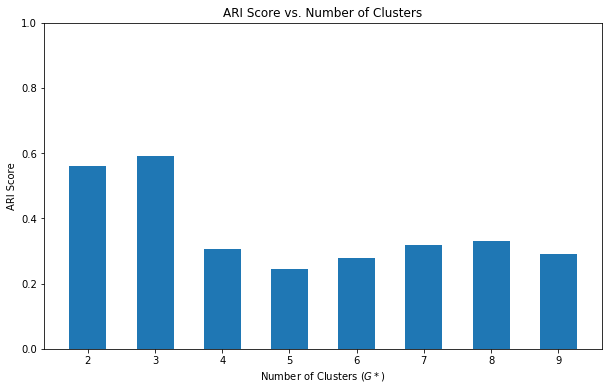

In [169]:
plt.pyplot.figure(figsize=(10, 6))
# plotting the results
plt.pyplot.bar(x = G_vect,
               height = rand_index_G_vect,
               width = .55)
plt.pyplot.xlabel('Number of Clusters ($G*$)')
plt.pyplot.ylabel('ARI Score')
plt.pyplot.ylim(0,1)
plt.pyplot.title('ARI Score vs. Number of Clusters')
plt.pyplot.show()

### Feature Importance

In [170]:
import sys
weeks_exclude_vect = [[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15],[15,16,17]]
feature_list = list(X_train.columns)
rand_index_vect = []

# making a waitbar
toolbar_width = len(feature_list)

In [171]:
sys.stdout.write("[%s]" % (" " * toolbar_width))
sys.stdout.flush()
sys.stdout.write("\b" * (toolbar_width+1))

for feature in feature_list:
    
    rand_index_sum = 0

    # iterating through the week groupings to leave out
    for weeks_exclue in weeks_exclude_vect:
        # creating train/test groups
        train = sacks_df[[x not in weeks_exclude for \
                                 x in list(sacks_df["week"])]].drop([feature], axis = 1)
        test = sacks_df[[x in weeks_exclude for \
                                x in list(sacks_df["week"])]].drop([feature], axis = 1)

        X_train = train.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
        X_test = test.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)

        # train
        clf_train = mixture.GaussianMixture(n_components=2, covariance_type='full')
        f_train = clf_train.fit(X_train)

        # test
        clf_test = mixture.GaussianMixture(n_components=2, covariance_type='full')
        f_test = clf_test.fit(X_test)

        # classifying test group
        y_train = f_train.predict(X_test)
        y_test = f_test.predict(X_test)

        # appling the adjusted rand index
        rand_index_val = adjusted_rand_score(y_train, y_test)
        rand_index_sum += rand_index_val

    rand_index = rand_index_sum/len(weeks_exclude_vect)
    
    rand_index_vect.append(rand_index)
    
    sys.stdout.write("-")
    sys.stdout.flush()

[                ----------------

In [172]:
d = {'feature': feature_list, 'delta_ARI': rand_index_G_vect[0] - np.array(rand_index_vect)}
feature_imp_df = pd.DataFrame(data=d).sort_values('delta_ARI', ascending = False)
feature_imp_df["base_feature"] = [x.split('_pass_forward')[0] if "pass_forward" in x \
                                  else x.split('_ball_snap')[0] if "ball_snap" in x \
                                  else x.split('_time')[0] for x in np.array(feature_imp_df["feature"])]
feature_imp_df["time_period"] = ["Before Ball Thrown" if "pass_forward" in x \
                                 else "Before Ball Thrown" if "ball_snap" in x \
                                 else "After Ball Thrown" if x.endswith("2") \
                                 else "Before Ball Thrown" for x in np.array(feature_imp_df["feature"])]
feature_imp_df["feature"] = [x.upper() for x in feature_imp_df["feature"]]

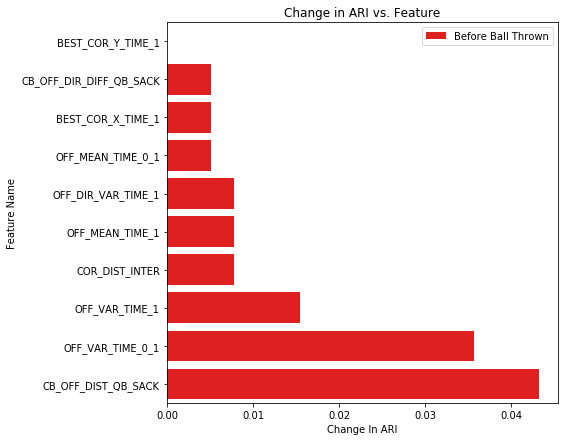

In [173]:
plt.pyplot.figure(figsize=(7,7))

sns.barplot(x="delta_ARI", y="feature", data=feature_imp_df.head(10).sort_values('delta_ARI', ascending = True),
            hue = "time_period", dodge = False, palette = ["red", "blue"])
plt.pyplot.gca().legend().set_title('')
plt.pyplot.title('Change in ARI vs. Feature')
plt.pyplot.ylabel('Feature Name')
plt.pyplot.xlabel('Change In ARI')
plt.pyplot.show()

### Scoring All Plays

In [208]:
sacks_df

,week,gameId,playId,nflId,displayName,position,off_var_time_0,off_var_time_0_1,off_var_time_1,off_mean_time_0,...,off_dir_var_time_1,off_dir_mean_time_0_1,off_dir_mean_time_1,cor_s_time_1,cb_off_dir_diff_qb_sack,cb_off_dist_qb_sack,best_cor_x_time_1,best_cor_y_time_1,best_cor_x_y_avg_time_1,cor_dist_inter
0,1,2018090600,776,2552301,Vic Beasley,OLB,0.000054,7.225394,8.588984,2.513854,...,2142.696558,74.006458,66.178684,0.764220,31.19,9.550775,0.988115,0.427971,0.708043,0.120127
1,1,2018090600,776,2555162,Deion Jones,MLB,0.000074,8.788880,7.742856,9.555725,...,456.666513,35.668750,27.611842,0.927958,9.99,1.269055,0.985413,0.640412,0.812913,0.118920
2,1,2018090600,839,2552301,Vic Beasley,OLB,0.000022,16.777484,16.343167,2.105464,...,1277.701078,70.846271,69.978776,0.014541,65.97,8.770091,0.969199,0.697843,0.833521,0.101113
3,1,2018090600,839,2555162,Deion Jones,MLB,0.000010,6.422039,7.592978,6.684927,...,2199.712876,62.372034,63.686939,0.538696,60.60,9.355154,0.879990,0.406924,0.643457,0.072606
4,1,2018090600,839,2555255,De'Vondre Campbell,OLB,0.014267,3.079978,3.718855,6.003950,...,3617.688800,70.053729,63.390000,0.678549,5.19,7.037230,0.933017,0.981179,0.957098,0.151932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1762,17,2018123015,2742,2557887,Haason Reddick,ILB,0.000324,4.623800,3.840018,5.912411,...,868.887316,48.922453,46.378140,0.494366,81.42,2.112061,0.977971,0.650279,0.814125,0.237654
1763,17,2018123015,3089,2532966,Bobby Wagner,MLB,0.003252,2.537496,2.952989,5.286575,...,1790.933055,99.946429,105.099348,-0.034342,50.34,7.824379,0.708685,0.495275,0.601980,0.058578
1764,17,2018123015,3734,2543769,Deone Bucannon,ILB,0.009298,0.589036,0.387832,6.409548,...,1078.587029,80.022444,59.500571,0.503906,51.28,6.987453,0.978084,0.925383,0.951734,0.117870
1765,17,2018123015,3932,2495252,K.J. Wright,OLB,0.000082,11.116993,12.181435,5.766865,...,1665.236532,104.787193,117.330638,0.496298,130.72,7.327892,-0.221693,0.984138,0.381223,0.017071


In [209]:
# sampling 45,000 plays to be within CPU limit
X_train = sacks_df.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
X_train.shape

(1767, 16)

In [210]:
# all plays to score
X_score = sacks_df.drop(['week', 'gameId','playId','nflId','displayName','position'], axis = 1)
X_score.shape

(1767, 16)

In [211]:
# train
clf_train = mixture.GaussianMixture(n_components=3, covariance_type='full')
f_train = clf_train.fit(X_train)

In [212]:
get_cluster_means(X_train, f_train)

{'best_cor_x_time_1': (0.41176135870267305,
  0.9361718743740566,
  0.8307003041368405),
 'best_cor_x_y_avg_time_1': (0.6143132196181513,
  0.9449322824952547,
  0.7991983977831953),
 'best_cor_y_time_1': (0.8168650805336294,
  0.9536926906164529,
  0.7676964914295504),
 'cb_off_dir_diff_qb_sack': (53.193300471689696,
  30.002857825248608,
  56.55538576210145),
 'cb_off_dist_qb_sack': (4.877527781146536,
  2.4992859676702897,
  5.346097188392757),
 'cor_dist_inter': (0.0834578601570953,
  0.31632179030307156,
  0.1259956958491019),
 'cor_s_time_1': (0.5137969701630074, 0.7442558714239332, 0.6073942459597832),
 'off_dir_mean_time_0_1': (66.56827452642442,
  46.532841030780325,
  65.18855751544336),
 'off_dir_mean_time_1': (60.83808429938378,
  36.536530435711356,
  58.84749771703572),
 'off_dir_var_time_1': (1865.5415899776342,
  1359.0222317396972,
  1833.301658573762),
 'off_mean_time_0': (7.509064679739424, 5.600122434501457, 6.840968463735468),
 'off_mean_time_0_1': (6.0070150459539

In [213]:
full_probs = [1 - x[1] for x in f_train.predict_proba(X_score)]
full_classes = [0 if x==1 else 1 for x in f_train.predict(X_score)]

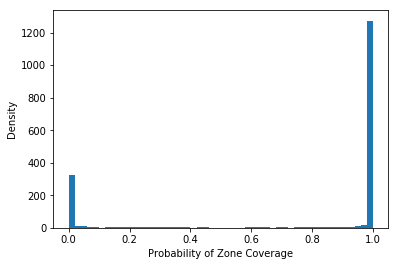

In [214]:
plt.pyplot.hist(full_probs, bins = 50)
plt.pyplot.xlabel('Probability of Zone Coverage')
plt.pyplot.ylabel('Density')
plt.pyplot.show()

In [215]:
sacks_df["zone_probability"] = full_probs
sacks_df["zone_flag"] = full_classes

### Saving Results

In [216]:
sacks_df_final = sacks_df[['week', 'gameId','playId','nflId','displayName','position'] + \
                                     list(sacks_df.columns[[x.startswith('zone') for x in sacks_df.columns]])].sort_values(['gameId','playId','position'])

In [217]:
sacks_df_final

,week,gameId,playId,nflId,displayName,position,zone_probability,zone_flag
1,1,2018090600,776,2555162,Deion Jones,MLB,1.000000,1
0,1,2018090600,776,2552301,Vic Beasley,OLB,1.000000,1
3,1,2018090600,839,2555162,Deion Jones,MLB,1.000000,1
2,1,2018090600,839,2552301,Vic Beasley,OLB,1.000000,1
4,1,2018090600,839,2555255,De'Vondre Campbell,OLB,0.999883,1
...,...,...,...,...,...,...,...,...
1762,17,2018123015,2742,2557887,Haason Reddick,ILB,0.999241,1
1763,17,2018123015,3089,2532966,Bobby Wagner,MLB,1.000000,1
1764,17,2018123015,3734,2543769,Deone Bucannon,ILB,1.000000,1
1766,17,2018123015,3932,2532966,Bobby Wagner,MLB,1.000000,1


In [218]:
sacks_df_final.to_csv("~/Desktop/CoverageNet/src/01_identify_man_coverage/outputs/linebackers_sacks_man_zone_classes.csv", 
                      index = False)

In [122]:
sacks_df[(sacks_df["gameId"] == 2018090901) & (sacks_df["playId"] == 2885)]

,week,gameId,playId,nflId,displayName,position,off_var_time_0,off_var_time_0_1,off_var_time_1,off_mean_time_0,...,off_dir_mean_time_1,cor_s_time_1,cb_off_dir_diff_qb_sack,cb_off_dist_qb_sack,best_cor_x_time_1,best_cor_y_time_1,best_cor_x_y_avg_time_1,cor_dist_inter,zone_probability,zone_flag


In [123]:
sacks_df[(sacks_df["gameId"] == 2018090901) & (sacks_df["playId"] == 2885)][["displayName"] + \
                            list(sacks_df.columns[['cor_s' in x for x in sacks_df.columns]])]

,displayName,cor_s_time_1
